<a href="https://colab.research.google.com/github/AhamedShimak/pytorch/blob/main/computer_vision_cnn_code_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT AND MY DEFINED FUNCTIONS

### Imports

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets

from tqdm.auto import tqdm

import sklearn
from sklearn.model_selection import train_test_split

###My functions

In [73]:
import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

def details_loss_curve(epochs,train_loss_track,test_loss_track):
  #loss curve
  plt.figure(figsize=(8,8))
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(epochs,train_loss_track,label="Train loss")
  plt.plot(epochs,test_loss_track,label="Test loss")
  plt.legend(prop={"size": 14})

import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});



def accu(y_pred,y_test):
  correct=torch.eq(y_pred.squeeze(),y_test.squeeze()).sum().item()
  accuracy=(correct/len(y_test))*100
  return accuracy

def details_plot_scatter(x_train, x_test, y_train, y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.BrBG, s=4, label="Training data")
  plt.scatter(x_test[:,0],x_test[:,1],c=y_test, s=60, label="Test data")
  plt.legend(prop={"size": 14});
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(x_test[:,0],x_test[:,1],c=predictions, s=20, label="Prediction")

  # Show the legend
  plt.legend(prop={"size": 14});

def evaluate(model:torch.nn.Module,
             loss_func:torch.nn.Module,
             data_loader:torch.utils.data.DataLoader,
             accu
             ):
  model_name=model.__class__.__name__
  model.eval()
  loss,accuracy=0,0
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y=x.to(device),y.to(device)
      predict=model(x)
      loss+=loss_func(predict,y)
      accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  loss=loss/len(data_loader)
  accuracy=accuracy/len(data_loader)
  return {"Model Name":model_name,"Accuracy":accuracy,"Loss":loss.item()}

###GPU

In [3]:
!nvidia-smi
print(torch.cuda.is_available())
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

Thu Apr 27 07:32:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##DATA PROCESS 


ex- tensor data-> x_train,y_train,x_test,y_test


In [4]:
# create data

train=datasets.FashionMNIST(
    root="Data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test=datasets.FashionMNIST(
    root="Data_test",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)
#weight and bias

  #######to prevent mat multiplication error   .unsqueeze(dim=1)


100%|██████████| 26421880/26421880 [00:03<00:00, 8700551.62it/s] 


Extracting Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 144046.86it/s]


Extracting Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2671465.08it/s]


Extracting Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6451233.04it/s]


Extracting Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:03<00:00, 8448848.29it/s] 


Extracting Data_test/FashionMNIST/raw/train-images-idx3-ubyte.gz to Data_test/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 143729.94it/s]


Extracting Data_test/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Data_test/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2649368.41it/s]


Extracting Data_test/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Data_test/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19773147.43it/s]

Extracting Data_test/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Data_test/FashionMNIST/raw



In [5]:
details(train.data[0])


Shape:  torch.Size([28, 28])
Dimentions:  2
###########
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12, 

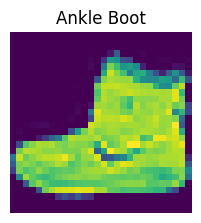

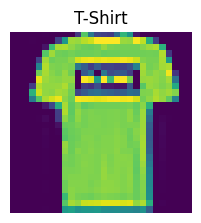

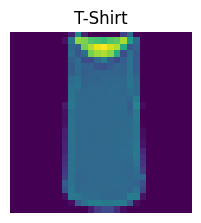

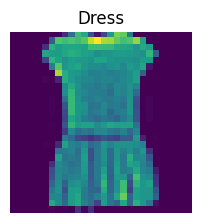

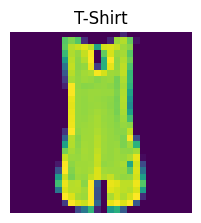

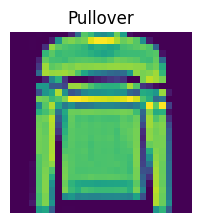

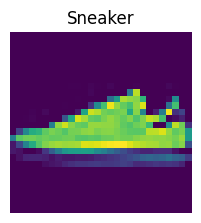

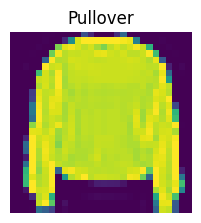

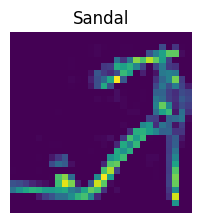

In [6]:
# create train/test split
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
for i in range(9):
  img,label=train[i]
  plt.figure(figsize=(8,8)).add_subplot(3,3,i+1)
  plt.imshow(img.squeeze())
  plt.title(labels_map[label])
  plt.axis("off")
  

In [7]:
#data_loader
torch.manual_seed(23)
train_dataloader = DataLoader(train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test, batch_size=32, shuffle=False)

len(train_dataloader),len(test_dataloader)

(1875, 313)


Shape:  torch.Size([32, 1, 28, 28])
Dimentions:  4
###########
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.2196, 0.0039, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

Text(0.5, 1.0, 'T-Shirt')

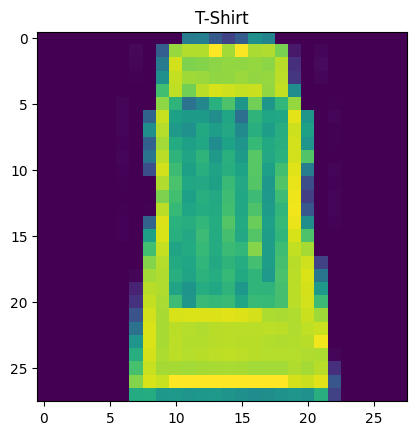

In [8]:
x_train_b_sample,y_train_b_sample=next(iter(train_dataloader))
details(x_train_b_sample),details(y_train_b_sample)

plt.imshow(x_train_b_sample[0].squeeze())
plt.title(labels_map[y_train_b_sample[0].item()])

##BUILDING THE MODEL


tips
1. torch.nn.find_suitable_loss
2. torch.nn.Paramenter
3. torch.nn.Module this is base class
4. torch.optim - optimizer

In [9]:
#flattern layer
details(x_train_b_sample)
flattern=nn.Flatten()
details(flattern(x_train_b_sample))


Shape:  torch.Size([32, 1, 28, 28])
Dimentions:  4
###########
tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.2196, 0.0039, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

In [51]:
#model
class fashion_model_V00(nn.Module):
  def __init__(self,in_,out_):
    super().__init__()
    #model_structer
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.ReLU(),
        nn.Linear(in_,512),
        nn.ReLU(),
        nn.Linear(512,128),
        nn.ReLU(),
        nn.Linear(128,32),
        nn.ReLU(),
        nn.Linear(32,out_)
    )
  def forward(self,x: torch.Tensor) -> torch.Tensor:


    return self.layer_stack(x)




In [102]:
#model_v01
class fashion_model_V01(nn.Module):
  def __init__(self,in_,out_):
    super().__init__()
    #model_structer
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.ReLU(),
        nn.Linear(in_,20),
        nn.ReLU(),
        nn.Linear(20,32),
        nn.ReLU(),
        nn.Linear(32,out_)
    )
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

In [103]:
#model_2
class fashion_model_V02(nn.Module):
  def __init__(self,in_,out_):
    super().__init__()
    #model_structer
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_,8),
        nn.ReLU(),
        nn.Linear(8,out_)
    )
  def forward(self,x: torch.Tensor) -> torch.Tensor:


    return self.layer_stack(x)

In [111]:

#discription of model
model0=fashion_model_V00(in_=784,out_=10).to(device)
model0.state_dict()

OrderedDict([('layer_stack.2.weight',
              tensor([[ 0.0198,  0.0321,  0.0148,  ..., -0.0206,  0.0278, -0.0015],
                      [-0.0190,  0.0236, -0.0241,  ...,  0.0189, -0.0275,  0.0139],
                      [-0.0145, -0.0341,  0.0217,  ...,  0.0142, -0.0029,  0.0157],
                      ...,
                      [-0.0192,  0.0347, -0.0290,  ..., -0.0265,  0.0122,  0.0007],
                      [-0.0221,  0.0168,  0.0302,  ...,  0.0310,  0.0133, -0.0249],
                      [ 0.0134, -0.0159, -0.0295,  ...,  0.0026,  0.0184, -0.0208]],
                     device='cuda:0')),
             ('layer_stack.2.bias',
              tensor([ 2.0770e-02, -1.5897e-02,  1.3885e-03,  5.7328e-03,  2.4000e-02,
                      -2.0996e-02, -2.1291e-02,  2.4938e-02, -1.3132e-02, -1.8763e-02,
                       1.6675e-02,  1.5726e-02,  3.5685e-02,  2.8385e-02, -6.8261e-03,
                       9.3645e-03,  3.8678e-03, -2.8161e-03, -1.6410e-02,  3.1908e-02,
      

In [105]:
#discription of model1
model1=fashion_model_V01(in_=784,out_=10).to(device)
model1.state_dict()

OrderedDict([('layer_stack.2.weight',
              tensor([[-0.0185,  0.0036, -0.0078,  ...,  0.0177,  0.0175, -0.0262],
                      [ 0.0302, -0.0108,  0.0213,  ...,  0.0011,  0.0111, -0.0213],
                      [-0.0309,  0.0005,  0.0181,  ..., -0.0182, -0.0267,  0.0169],
                      ...,
                      [-0.0046, -0.0064,  0.0167,  ..., -0.0321, -0.0286, -0.0289],
                      [-0.0262, -0.0224,  0.0356,  ...,  0.0308, -0.0130,  0.0192],
                      [ 0.0011,  0.0274, -0.0087,  ...,  0.0117,  0.0256, -0.0092]],
                     device='cuda:0')),
             ('layer_stack.2.bias',
              tensor([-0.0288, -0.0129,  0.0048,  0.0348, -0.0191, -0.0124, -0.0199,  0.0077,
                       0.0136,  0.0034, -0.0146,  0.0111, -0.0303,  0.0293, -0.0356, -0.0107,
                       0.0353, -0.0144,  0.0298,  0.0174], device='cuda:0')),
             ('layer_stack.4.weight',
              tensor([[ 0.1474,  0.2075,  0.1225, 

In [106]:
#discription of model1
model2=fashion_model_V02(in_=784,out_=10).to(device)
model2.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0279,  0.0066, -0.0033,  ..., -0.0305, -0.0080,  0.0052],
                      [-0.0099, -0.0216,  0.0040,  ..., -0.0245,  0.0266,  0.0103],
                      [-0.0140, -0.0089,  0.0040,  ..., -0.0096, -0.0138,  0.0238],
                      ...,
                      [ 0.0087, -0.0114,  0.0281,  ..., -0.0241,  0.0344,  0.0032],
                      [ 0.0022,  0.0036, -0.0225,  ..., -0.0194, -0.0306,  0.0125],
                      [ 0.0008, -0.0107, -0.0320,  ..., -0.0011,  0.0187,  0.0147]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0304, -0.0116, -0.0050,  0.0172,  0.0094, -0.0189, -0.0247, -0.0190],
                     device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[-0.2053, -0.1203, -0.0674, -0.2669, -0.0876, -0.1955,  0.1236,  0.3007],
                      [-0.0676, -0.1995,  0.2392, -0.2423,  0.1968,  0.1489,  0.2382,

##CREATE OPTIMIZER / LOSS_FUNC

In [112]:
#create loss func
loss_func=nn.CrossEntropyLoss()
#optimizer
optimizer=torch.optim.SGD(model0.parameters(),lr=0.1)

##TRAINING / TESTING LOOP

tips
0. Loop throug the data
1. set to training mode
2. Forward pass
3. Calculate the loss(pred to ground truth)
4. optimizer zer grad
5. loss backward .. back propogation
6. optimizer step - use opt and adjust parameter ... grad desent


In [65]:
#x,y=test_dataloader.dataset[0]

In [113]:
from tqdm.auto import tqdm
#creating loop using batches
model=model0
epochs=15
train_loss_track=[]
test_loss_track=[]

for epoch in tqdm(range(epochs)):
  train_loss=0
  
  for batch, (x_,y_) in tqdm(enumerate(train_dataloader)):
    x_,y_=x_.to(device),y_.to(device)
    model.train()
    y_pred=model(x_)
    loss=loss_func(y_pred,y_)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   # print(loss,batch)
    train_loss_track.append(loss.detach().item())

  #test
  evaluation=evaluate(model,loss_func,test_dataloader,accu)
  print(evaluation)
  #plt.plot(train_loss_track)
  

  0%|          | 0/15 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 78.19488817891374, 'Loss': 0.6068472266197205}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 84.3849840255591, 'Loss': 0.4236603081226349}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 85.94249201277955, 'Loss': 0.39573240280151367}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 86.97084664536742, 'Loss': 0.35676851868629456}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 86.81110223642173, 'Loss': 0.36301425099372864}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 87.34025559105432, 'Loss': 0.3473477363586426}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 87.37020766773163, 'Loss': 0.34475642442703247}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 86.99081469648563, 'Loss': 0.35625195503234863}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 88.57827476038338, 'Loss': 0.31710904836654663}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 87.20047923322684, 'Loss': 0.3414166271686554}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 88.18889776357827, 'Loss': 0.3225994408130646}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 88.01916932907348, 'Loss': 0.33793723583221436}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 88.6082268370607, 'Loss': 0.33757904171943665}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 88.66813099041534, 'Loss': 0.3289222717285156}


0it [00:00, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 88.28873801916933, 'Loss': 0.33855509757995605}


  0%|          | 0/313 [00:00<?, ?it/s]

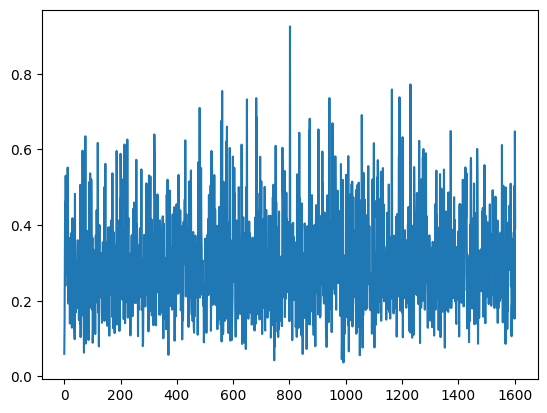

In [25]:
plt.plot(train_loss_track)

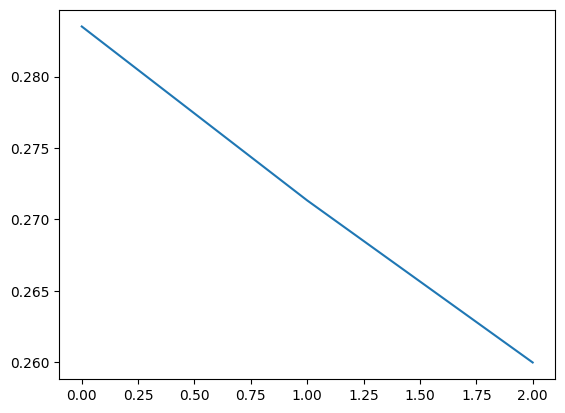

In [40]:
plt.plot(train_loss_track) #V01

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.28351 | Test loss: 0.34664, Test acc: 87.31%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.27133 | Test loss: 0.35289, Test acc: 87.29%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.25999 | Test loss: 0.34466, Test acc: 87.51%



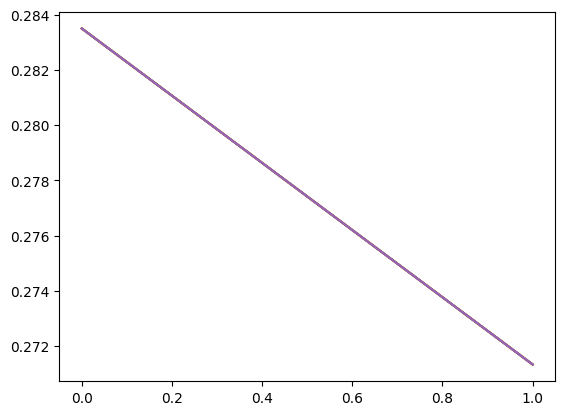

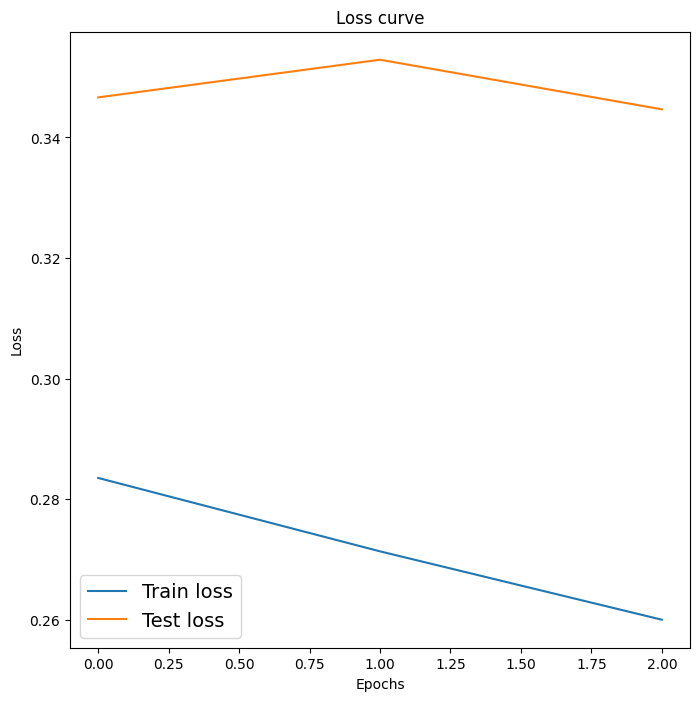

In [28]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
train_loss_track=[]
test_loss_track=[]

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        X,y=X.to(device),y.to(device)
        model.train() 
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_func(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            plt.plot(train_loss_track)

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    train_loss_track.append(train_loss.detach().item())
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 

    

    test_loss, test_acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X,y=X.to(device),y.to(device)
            # 1. Forward pass
            test_pred = model(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_func(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accu( test_pred.argmax(dim=1),y)
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
        test_loss_track.append(test_loss.detach().item())

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


details_loss_curve(range(epochs),train_loss_track,test_loss_track)

##EVALUATION OF THE MODEL

In [ ]:
evaluate()

In [38]:
def evaluate(model:torch.nn.Module,
             loss_func:torch.nn.Module,
             data_loader:torch.utils.data.DataLoader,
             accu
             ):
  model_name=model.__class__.__name__
  model.eval()
  loss,accuracy=0,0
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y=x.to(device),y.to(device)
      predict=model(x)
      loss+=loss_func(predict,y)
      accuracy+=accu(predict.squeeze().argmax(dim=1),y)
  loss=loss/len(data_loader)
  accuracy=accuracy/len(data_loader)
  return {"Model Name":model_name,"Accuracy":accuracy,"Loss":loss.item()}

85.78274760383387

In [91]:
print(evaluate(model0,loss_func,test_dataloader,accu))
print(evaluate(model1,loss_func,test_dataloader,accu))
print(evaluate(model2,loss_func,test_dataloader,accu))

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V00', 'Accuracy': 85.78274760383387, 'Loss': 0.38960641622543335}


  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V01', 'Accuracy': 84.9241214057508, 'Loss': 0.4142647683620453}


  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'fashion_model_V02', 'Accuracy': 81.93889776357827, 'Loss': 0.4988069236278534}


##SAVING/LOADING

tips
1.  torch.save() 
2.  torch.load()
3.  toch.nn.Module.load_state_dict()